In [117]:
import pandas as pd
import numpy as np

df = pd.read_excel('Resource.xlsx')

select_column = ['TypeJob', 'Budget', 'Width', 'Length', 'Height', 'Wood (pc.)', 'Lighting (pc.)', 'Nail (box.)', 'Table', 'Chair', 'Paint (bucket)', 'Booth', 
                 'BuildIN', 'Kiosk', 'Logo', 'Stage', 'Stand', 'Towerbox', 'Vinyl']

select_x = ['Budget', 'Width', 'Length', 'Height', 'Wood (sm.)', 'Booth', 
                 'BuildIN', 'Kiosk', 'Logo', 'Stage', 'Stand', 'Towerbox', 'Vinyl']

y_wood = ['Wood (pc.)']
y_lighting = ['Lighting (pc.)']
y_nail = ['Nail (box.)']
y_table = ['Table']
y_chair = ['Chair']
y_paint = ['Paint (bucket)']

data = df[select_column]

data_x = df[select_x]
data_y_wood = df[y_wood]
data_y_lighting = df[y_lighting]
data_y_nail = df[y_nail]
data_y_table = df[y_table]
data_y_chair = df[y_chair]
data_y_paint = df[y_paint]

df.describe()

,Reso_ID,Hire_ID,Year,Budget,Width,Length,Height,Wood (sm.),Wood (pc.),Lighting (pc.),...,Chair,Paint (bucket),Booth,BuildIN,Kiosk,Logo,Stage,Stand,Towerbox,Vinyl
count,455.000000,0.0,455.000000,4.550000e+02,455.000000,455.000000,455.00000,455.000000,455.000000,455.000000,...,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000
mean,250.512088,NaN,2020.883516,2.089813e+05,4.309231,4.022637,2.43000,61.229890,21.107692,24.173626,...,4.523077,2.523077,0.463736,0.292308,0.090110,0.021978,0.070330,0.015385,0.010989,0.035165
std,142.312924,NaN,1.793789,2.352527e+05,2.545931,2.894540,1.17332,77.264501,26.589460,12.109566,...,6.337343,3.276370,0.499232,0.455324,0.286654,0.146773,0.255983,0.123212,0.104366,0.184399
min,1.000000,NaN,2016.000000,9.500000e+03,0.400000,0.400000,0.30000,0.200000,0.000000,6.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,127.500000,NaN,2020.000000,4.500000e+04,2.500000,2.400000,1.80000,10.800000,4.000000,15.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,254.000000,NaN,2021.000000,1.200000e+05,4.000000,3.000000,2.50000,25.000000,9.000000,20.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,373.500000,NaN,2022.000000,3.000000e+05,6.000000,4.000000,3.35000,77.500000,27.000000,32.000000,...,8.000000,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,496.000000,NaN,2023.000000,1.800000e+06,14.000000,14.000000,8.00000,302.400000,104.000000,60.000000,...,24.000000,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [118]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics ##หาค่า MAE MSE(MAE**2) RMSE(ROOT(MSE))
import matplotlib.pyplot as plt

In [ ]:
#Wood Predict
xtrian,xtest,ytrian,ytest = train_test_split(data_x,data_y_wood,test_size=0.2,random_state=0)

model = LinearRegression()
model.fit(xtrian,ytrian)

#test
ypredict = model.predict(xtest)

print("MAE = ",metrics.mean_absolute_error(y_true=ytest, y_pred=ypredict))
print("MSE = ",metrics.mean_squared_error(y_true=ytest, y_pred=ypredict))
print("MSE = ",np.sqrt(metrics.mean_squared_error(y_true=ytest, y_pred=ypredict)))
## บอก Score ว่าแม่นยำกี่เปอร์เซ็นต์
print("Score = ",(metrics.r2_score(ytest,ypredict))*100)

MAE =  0.29389740178889473
MSE =  0.12571516799756877
MSE =  0.35456334835621234
Score =  99.98454286974362


,Budget,Width,Length,Height,Wood (sm.),Booth,BuildIN,Kiosk,Logo,Stage,Stand,Towerbox,Vinyl
354,35000,2.5,3.0,2.5,18.8,0,0,1,0,0,0,0,0
60,180000,5.0,12.0,3.6,216.0,1,0,0,0,0,0,0,0
293,30000,0.6,1.0,1.0,0.6,0,1,0,0,0,0,0,0
414,70000,4.0,5.0,1.0,20.0,0,0,0,0,1,0,0,0
113,350000,3.2,2.5,2.5,20.0,1,0,0,0,0,0,0,0


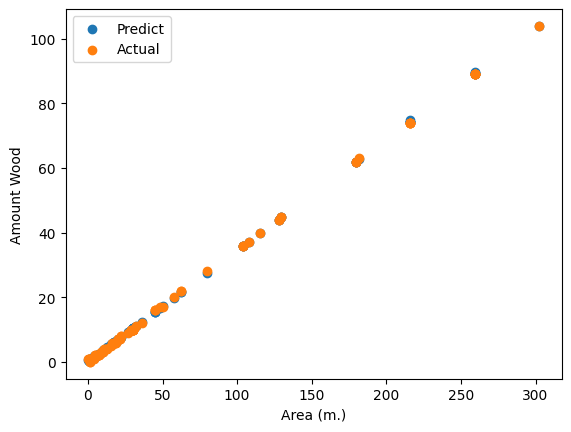

In [120]:
plt.scatter(xtest['Wood (sm.)'],ypredict, label = 'Predict')
plt.scatter(xtest['Wood (sm.)'],ytest, label = 'Actual')
plt.legend()
plt.xlabel("Area (m.)")
plt.ylabel("Amount Wood")
plt.show()
plt.show()

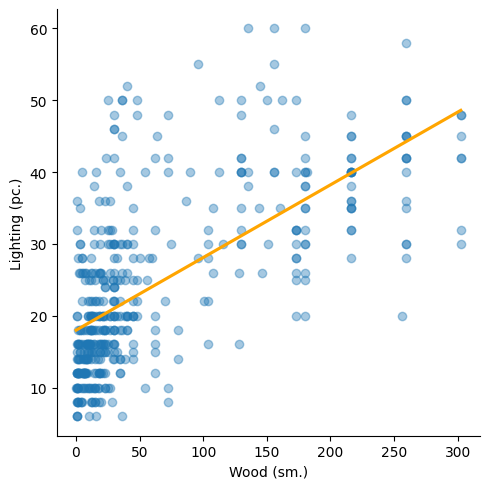

In [ ]:
import seaborn as sns

sns.lmplot(x='Wood (sm.)', y='Lighting (pc.)', data=df,ci=None,
           scatter_kws={'alpha': 0.4},
           line_kws={'color': 'orange'})

In [122]:
xtrian,xtest,ytrian,ytest = train_test_split(data_x,data_y_lighting,test_size=0.2,random_state=0)

model = LinearRegression()
model.fit(xtrian,ytrian)

#test
ypredict = model.predict(xtest)

print("MAE = ",metrics.mean_absolute_error(y_true=ytest, y_pred=ypredict))
print("MSE = ",metrics.mean_squared_error(y_true=ytest, y_pred=ypredict))
print("MSE = ",np.sqrt(metrics.mean_squared_error(y_true=ytest, y_pred=ypredict)))
## บอก Score ว่าแม่นยำกี่เปอร์เซ็นต์
print("Score = ",(metrics.r2_score(ytest,ypredict))*100)

MAE =  6.957498182223203
MSE =  75.45814799922097
MSE =  8.686664952628309
Score =  48.12953869754184


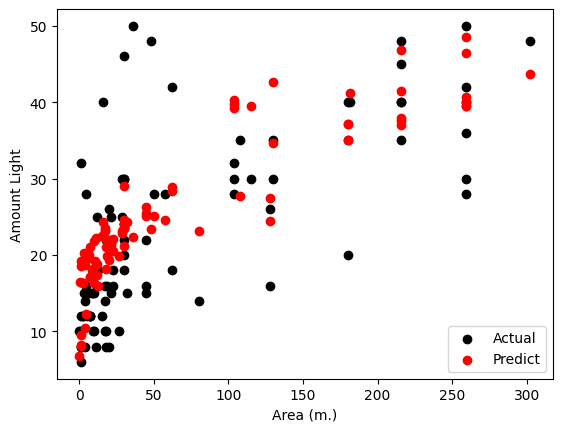

In [123]:
plt.scatter(xtest['Wood (sm.)'],ytest, label = 'Actual', c = 'black')
plt.scatter(xtest['Wood (sm.)'],ypredict, label = 'Predict', c = 'red')
plt.legend()
plt.xlabel("Area (m.)")
plt.ylabel("Amount Light")
plt.show()

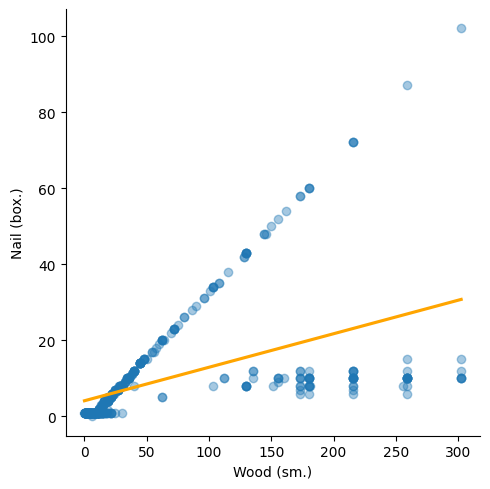

In [124]:
import seaborn as sns

sns.lmplot(x='Wood (sm.)', y='Nail (box.)', data=df,ci=None,
           scatter_kws={'alpha': 0.4},
           line_kws={'color': 'orange'},
           )


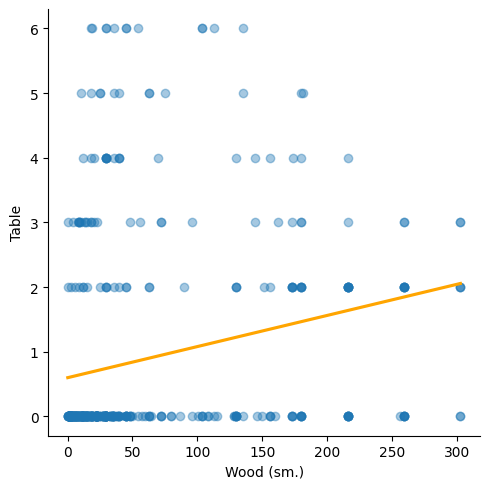

In [125]:
import seaborn as sns

sns.lmplot(x='Wood (sm.)', y='Table', data=df,ci=None,
           scatter_kws={'alpha': 0.4},
           line_kws={'color': 'orange'})


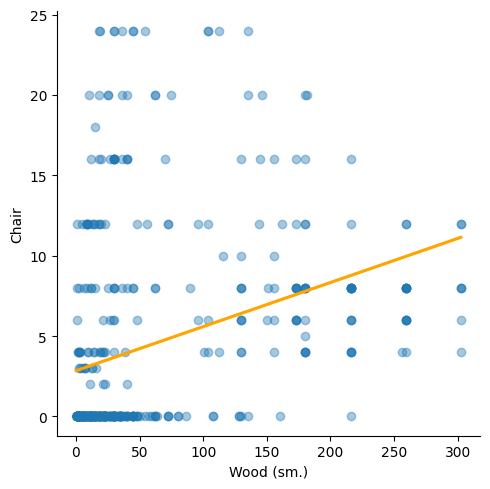

In [126]:
import seaborn as sns

sns.lmplot(x='Wood (sm.)', y='Chair', data=df,ci=None,
           scatter_kws={'alpha': 0.4},
           line_kws={'color': 'orange'})


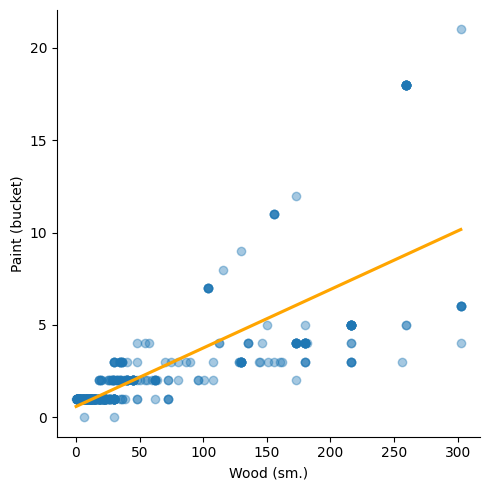

In [127]:
import seaborn as sns

sns.lmplot(x='Wood (sm.)', y='Paint (bucket)', data=df,ci=None,
           scatter_kws={'alpha': 0.4},
           line_kws={'color': 'orange'})
